# 2

In [1]:
import pandas as pd

from rpy2 import robjects
from rpy2.robjects import Formula

from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr

In [2]:
base = importr("base")
stats = importr("stats")
DESeq2 = importr("DESeq2")

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\rpy2\robjects\vectors.py:980: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '


In [3]:
counts = pd.read_csv("colon_cancer_tumor_vs_normal_paired_counts.tsv", sep="\t", index_col=0)
meta = pd.DataFrame({"Tissue": ["Tumor"]*5 + ["Normal"]*5}, index=counts.columns)
meta["Patient_id"]=meta.index.to_series().apply(lambda x: x[:-4])
meta["Tissue"] = stats.relevel(robjects.vectors.FactorVector(meta["Tissue"]), ref="Normal")

In [4]:
dds = DESeq2.DESeqDataSetFromMatrix(countData=counts, colData=meta, design=Formula("~Patient_id + Tissue "))
dds = DESeq2.DESeq(dds)
res = DESeq2.results(dds, name="Tissue_Tumor_vs_Normal")
res = DESeq2.lfcShrink(dds, coef="Tissue_Tumor_vs_Normal", type="apeglm")
res = pd.DataFrame(base.as_data_frame(res))
res.index = counts.index
res = res.sort_values("padj")
res = res.loc[res["padj"] < 0.05]
res = res.loc[res["log2FoldChange"].abs() >= 1]

R[write to console]:   Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

R[write to console]: estimating size factors

R[write to console]:   Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]:   Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) 

In [5]:
meta_np = pd.DataFrame({"Tissue": ["Tumor"]*5 + ["Normal"]*5}, index=counts.columns)
meta_np["Tissue"] = stats.relevel(robjects.vectors.FactorVector(meta["Tissue"]), ref="Normal")

# Calculate normalization factors
dds_np = DESeq2.DESeqDataSetFromMatrix(countData=counts, colData=meta, design=Formula("~Tissue"))
dds_np = DESeq2.DESeq(dds_np)

res_np = DESeq2.results(dds_np, name="Tissue_Tumor_vs_Normal")
res_np = DESeq2.lfcShrink(dds_np, coef="Tissue_Tumor_vs_Normal", type="apeglm")
res_np = pd.DataFrame(base.as_data_frame(res_np))
res_np.index = counts.index
res_np = res_np.sort_values("padj")
res_np = res_np.loc[res_np["padj"] < 0.05]
res_np = res_np.loc[res_np["log2FoldChange"].abs() >= 1]

res_np.to_csv("DESeq2_results_unpaired.tsv", sep="\t")

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



In [47]:
print('число для парного теста:\t%s\n'%res_np.shape[0], 
      'число для непарного теста:\t%s\n'%res.shape[0])

число для парного теста:	3698
 число для непарного теста:	3848



In [51]:
top_10_np=res_np.nsmallest(10,columns='padj').index
top_10=res.nsmallest(10,columns='padj').index
print(len(top_10.intersection(top_10_np)))

4


 # 3

In [52]:
from scipy.stats import ttest_ind, mannwhitneyu

In [97]:
df_fpkm=pd.read_csv('colon_cancer_tumor_vs_normal_unpaired_FPKM.tsv', sep='\t', index_col=0)

In [142]:
tt=pd.Series(ttest_ind(df_fpkm.iloc[:,0:5],df_fpkm.iloc[:,5:], axis=1)[1],index=df_fpkm.index)
mm=df_fpkm.apply(lambda x: mannwhitneyu(x.iloc[0:5],x.iloc[5:])[1], axis=1)

In [102]:
counts = pd.read_csv("colon_cancer_tumor_vs_normal_unpaired_counts.tsv", sep="\t", index_col=0)
# Define meta
meta_np = pd.DataFrame({"Tissue": ["Tumor"]*5 + ["Normal"]*5}, index=counts.columns)
meta_np["Tissue"] = stats.relevel(robjects.vectors.FactorVector(meta["Tissue"]), ref="Normal")

# Calculate normalization factors
dds_np = DESeq2.DESeqDataSetFromMatrix(countData=counts, colData=meta, design=Formula("~Tissue"))
dds_np = DESeq2.DESeq(dds_np)

res_np = DESeq2.results(dds_np, name="Tissue_Tumor_vs_Normal")
res_np = DESeq2.lfcShrink(dds_np, coef="Tissue_Tumor_vs_Normal", type="apeglm")
res_np = pd.DataFrame(base.as_data_frame(res_np))
res_np.index = counts.index
res_np = res_np.sort_values("padj")
res_np = res_np.loc[res_np["padj"] < 0.05]
res_np = res_np.loc[res_np["log2FoldChange"].abs() >= 1]

res_np.to_csv("DESeq2_results_unpaired.tsv", sep="\t")

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



In [145]:
top_10_tt=tt.nsmallest(10).index
top_10_mm=mm.nsmallest(10).index
top_10_dsc=res_np.padj.nsmallest(10).index

In [152]:
int_tt_mm=top_10_tt.intersection(top_10_mm)
int_tt_dsc=top_10_tt.intersection(top_10_dsc)
int_mm_dsc=top_10_mm.intersection(top_10_dsc)
print(int_tt_mm,'\t',int_tt_dsc,'\t',int_mm_dsc)

Index([], dtype='object') 	 Index(['C17orf96', 'IER5L', 'FUT1'], dtype='object') 	 Index([], dtype='object')


In [153]:
int_tt_dic

Index(['IER5L', 'FUT1', 'C17orf96'], dtype='object')

In [154]:
int_tt_dsc

Index(['C17orf96', 'IER5L', 'FUT1'], dtype='object')

In [155]:
top_10_tt

Index(['C17orf96', 'IER5L', 'FUT1', 'CDH3', 'FXYD5', 'ZNHIT2', 'CLCA4',
       'ACADSB', 'MT1F', 'PIGN'],
      dtype='object')

# 4

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

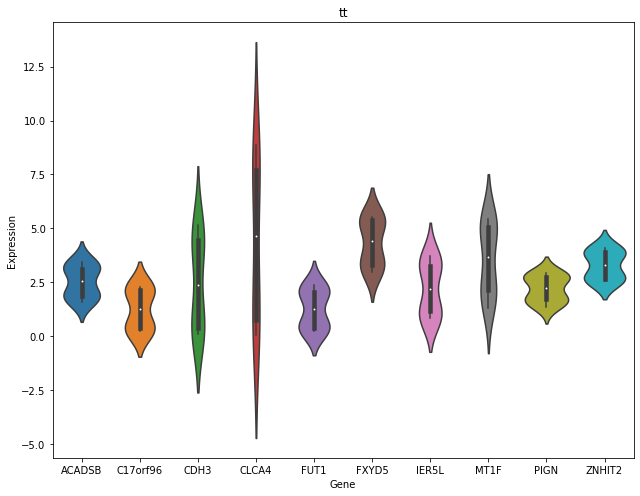

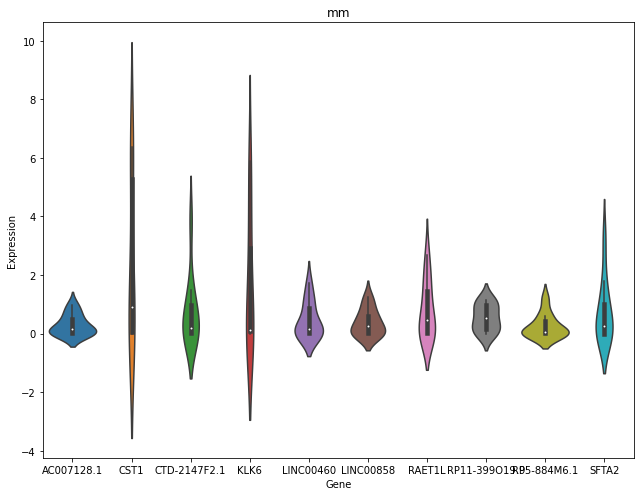

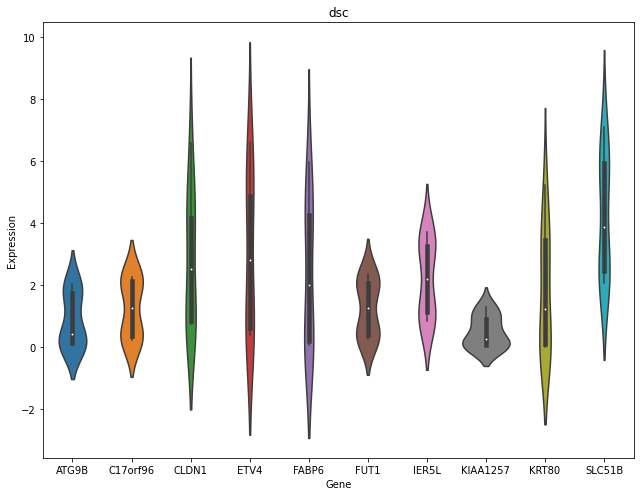

In [204]:
vi_df=df_fpkm.T.melt(var_name="Gene", value_name="Expression")
for i,j in zip(list([top_10_tt,top_10_mm,top_10_dsc]),range(3)):
    plt.figure(figsize=(9,7))
    sns.violinplot(x="Gene", y="Expression", data=vi_df[vi_df['Gene'].isin(i)]).set_title(['tt','mm','dsc'][j])
    plt.tight_layout()


# 5

In [18]:
all_genes=pd.read_csv('all_genes.txt', sep = '\n', header = None, index_col = 0)
print(*all_genes.sample(n=1000).index, sep = '\n')

RNU6-130P
ANKRD26P2
RN7SL675P
HMGB1P47
CDK2AP2
RPL13AP7
AC016907.2
RP4-813D12.3
AP000897.1
RNU4-74P
RP11-378J18.9
IFNW1
EYA1
AL021398.2
CTB-31N19.5
TUBB8P4
FAM109B
NME2P1
RP11-755B10.3
PLK2
RPS29P13
SLK
RP1-78B3.1
ERI3-IT1
RP11-297L17.6
AC110611.1
FAM151A
AC007562.1
LL0XNC01-7P3.1
OR6W1P
RP11-537H15.4
NIP7P1
RNU4-53P
MIR7-2
GLIS2-AS1
ZNF777
RP11-433O3.1
AACSP1
RERG-AS1
CD97
NKG7
CYP2F2P
RP11-440G9.1
KRTAP25-1
CTD-2013N17.6
FAM98B
CTD-2510F5.2
AC013267.1
KIRREL-IT1
RP11-729I10.2
PP12613
RP11-249C24.10
RASSF10
SLC25A15P5
TRAPPC2P2
MRPS17P1
RP11-334C17.5
AL109805.1
TNFSF10
KIAA2026
AC016549.1
LINC00700
AC073089.1
MYO5BP2
PNRC2
RN7SL147P
ARMC10P1
AIM1L
AL354933.1
NEU1
RP11-211G23.1
IKBKGP1
AC002398.9
TRAJ12
RP5-906A24.1
TRBV7-4
ATG16L2
IFNWP2
CYP4F2
AC139099.5
RP11-296O14.2
RP11-781M16.2
RNU6-1272P
MIR1231
CTC-523E23.14
GRB10
AC023469.2
SGOL1P2
SWT1
KRT8P39
KCNE2
SOX15
CLVS1
RP11-565N2.1
C12orf66
SNORA72
TRAV32
CCDC162P
PAICSP6
CTB-49A3.2
KLK10
RP11-500B12.1
CYP2G2P
AC112219.1
ELMOD1
DUTP8